# EDA Practice using mtcars dataset

In [1]:
# 기본 라이브러리 로딩 및 사용자 정의함수 정의

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')


# define universally useful UDFs

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)


In [2]:
# read mtcars sample dataset
# the first column is set to index

# mtcars = pd.read_csv('C:/YONG/m1710/myPydata/mtcars.csv', index_col=0)
mtcars = pd.read_csv('http://cfile208.uf.daum.net/attach/99F8633E5E8ECB130D9502', index_col=0)

mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


- The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

In [3]:
mtcars.shape

(32, 11)

## basic plotting

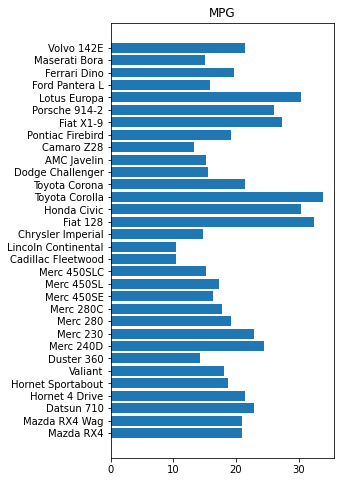

In [4]:
plt.figure(figsize=(4,8))
plt.barh(mtcars.index, mtcars.mpg)
plt.title('MPG')
plt.show()

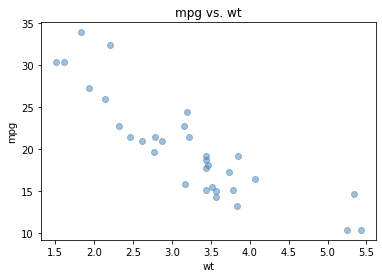

In [5]:
plt.scatter(mtcars.wt, mtcars.mpg, 
            alpha=0.5, color='steelblue')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mpg vs. wt')
plt.show()

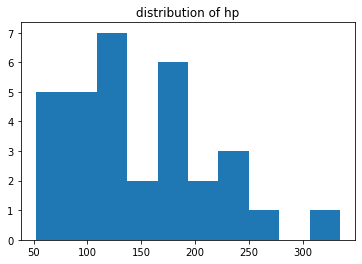

In [6]:
# histogram

plt.hist(mtcars.hp)
plt.title('distribution of hp')
plt.show()

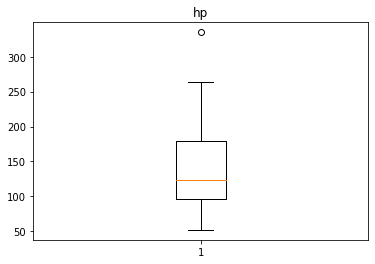

In [7]:
# boxplot

plt.boxplot(mtcars.hp)
plt.title('hp')
plt.show()

## advanced plotting

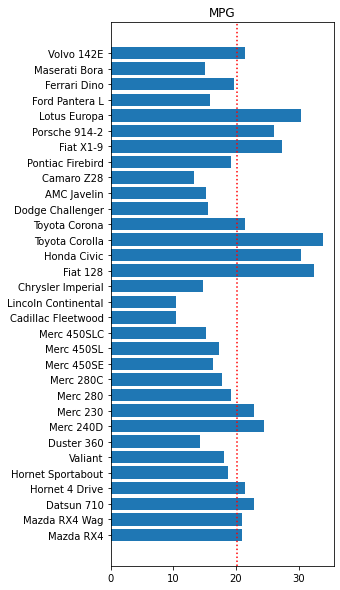

In [8]:
plt.figure(figsize=(4,10))
plt.barh(mtcars.index, mtcars.mpg)
plt.title('MPG')
plt.axvline(mtcars.mpg.mean(), color='red', linestyle=':')
plt.show()

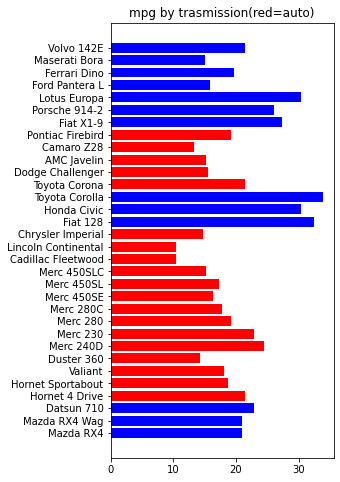

In [9]:
colors1 = np.where(mtcars.am==0,'red','blue')
plt.figure(figsize=(4,8))
plt.barh(mtcars.index, mtcars.mpg, color=colors1)
plt.title('mpg by trasmission(red=auto)')
plt.show()

two coloring arrays are equal?  True


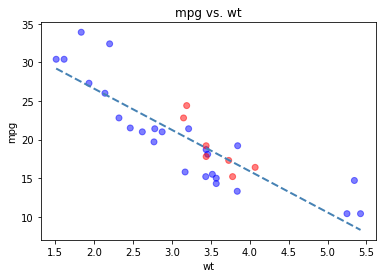

In [10]:
# red if mercedez
colors1 = np.where(mtcars.index.str.slice(0,4).astype(str) =='Merc','red','blue')

# alternatively
colors2 = ['red' if x=='Merc' else 'blue' for x in mtcars.index.str.slice(0,4).astype(str)]

print('two coloring arrays are equal? ', np.array_equal(colors1, colors2))


plt.scatter(mtcars.wt, mtcars.mpg, 
            alpha=0.5, color=colors1)
plt.xlabel('wt')
plt.ylabel('mpg')

# 선형회귀선 추가
plt.plot(np.unique(mtcars.wt), np.poly1d(np.polyfit(mtcars.wt, mtcars.mpg, 1))(np.unique(mtcars.wt)), 
         color='steelblue', linewidth=2, linestyle='--')
plt.title('mpg vs. wt')
plt.show()

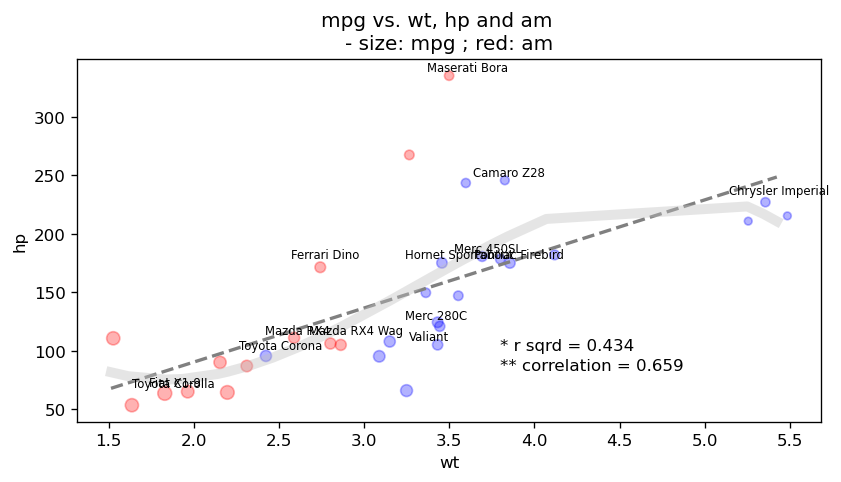

In [11]:
from sklearn.metrics import r2_score

nobs = len(mtcars)
varx = mtcars.wt
vary = mtcars.hp
colors1 = ['red' if x==1 else 'blue' for x in mtcars.am]
# adjust scale
size1 = mtcars.mpg / mtcars.mpg.max() *70

plt.figure(figsize = (8,4), dpi=120)
plt.scatter(rjitt(varx), rjitt(vary), 
            alpha=0.3, color=colors1, s=size1)
plt.xlabel('wt')
plt.ylabel('hp')
plt.suptitle('mpg vs. wt, hp and am', size=12)
plt.title('- size: mpg ; red: am')
plt.plot(np.unique(varx), np.poly1d(np.polyfit(varx, vary, 1))(np.unique(varx)), 
         color='grey', linewidth=2, linestyle='--')
plt.plot(np.unique(varx), np.poly1d(np.polyfit(varx, vary, 3))(np.unique(varx)), 
         color='silver', linewidth=6, alpha=0.4, )

# r-squared 값과 상관계수 값을 주석으로 출력
rsqrd = r2_score(vary, np.poly1d(np.polyfit(varx, vary, 1))(varx))
rsqrdtxt = '* r sqrd = ' + str(round(rsqrd,3))
crrval = np.corrcoef(varx,vary)[0,1]
crrtxt = '** correlation = ' + str(round(crrval,3))
plt.text(varx.max()*0.7, vary.max()*0.3, rsqrdtxt)
plt.text(varx.max()*0.7, vary.max()*0.25, crrtxt)

# 점들에 대해 라벨을 표시
for x in list(mtcars.index):
    if x in np.random.choice(mtcars.index, 10):
        # 점 위에서 약간 떨어진 지점에 표시
        plt.text(varx[x]-0.2, vary[x]+4, x, size=7)
plt.show()

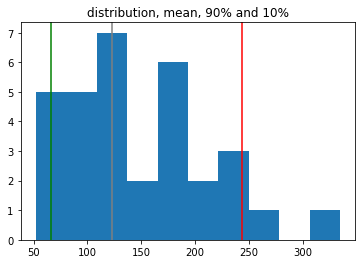

In [12]:
var = mtcars.hp
plt.hist(var)
plt.axvline(var.median(), color='grey')
plt.axvline(np.percentile(var,90), color='red')
plt.axvline(np.percentile(var,10), color='green')
plt.title('distribution, mean, 90% and 10%')
plt.show()

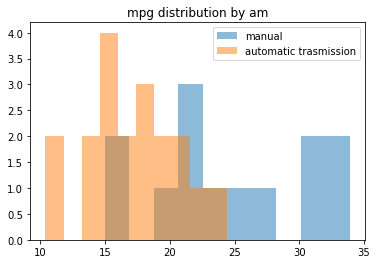

In [13]:
# overlapped histograms by group

mtcars1 = mtcars[mtcars.am==1]
mtcars2 = mtcars[mtcars.am==0]

plt.hist(mtcars1.mpg, alpha=0.5)
plt.hist(mtcars2.mpg, alpha=0.5)
plt.legend(['manual', 'automatic trasmission'])
plt.title('mpg distribution by am')
plt.show()

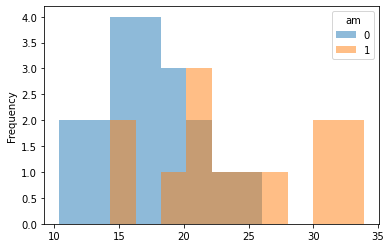

In [14]:
# similar histogram using pandas 

mtcars.pivot(columns="am", values="mpg").plot.hist(alpha=0.5, bins=12);

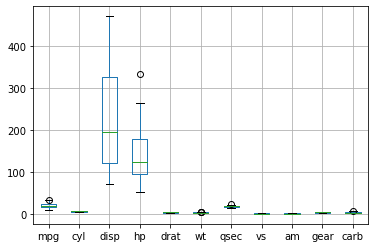

In [15]:
# multiple boxplots using pandas

mtcars.boxplot()
plt.show()

<AxesSubplot:>

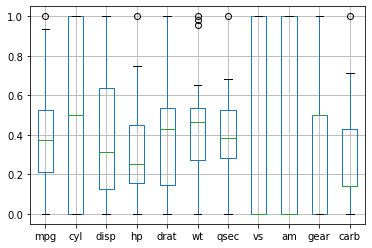

In [16]:
mtcars3 = mtcars.apply(mnmx_scl)
mtcars3.boxplot()

In [17]:
mtcars3.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
Mazda RX4 Wag,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
Datsun 710,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
Hornet 4 Drive,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
Hornet Sportabout,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857


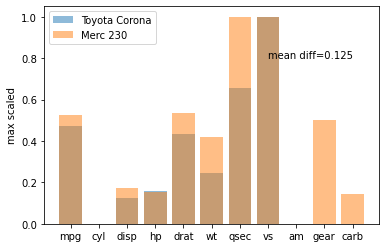

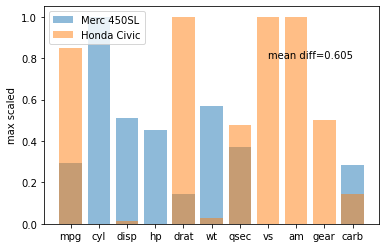

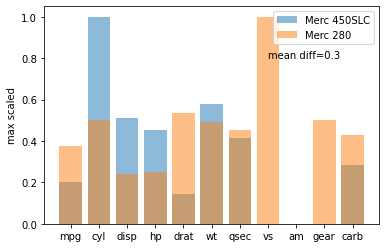

In [18]:
# Comparing Two Models

def compare_models(x1, x2):
    plt.bar(mtcars3.columns, mtcars3.loc[x1,:], alpha=0.5)
    plt.bar(mtcars3.columns, mtcars3.loc[x2,:], alpha=0.5)
    plt.legend([x1, x2])
    plt.ylabel('max scaled')
    meandifftxt = str(round(abs(mtcars3.loc[x1,:] - mtcars3.loc[x2,:]).mean(),3))
    plt.text(7,0.8, 'mean diff='+meandifftxt)
    plt.show()

# call fuctions with parameters(i.e. name of cars)    
compare_models(mtcars3.index[20], mtcars3.index[8])    
compare_models(mtcars3.index[12], mtcars3.index[18])    
compare_models('Merc 450SLC', 'Merc 280')    

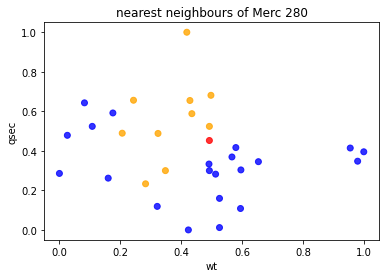

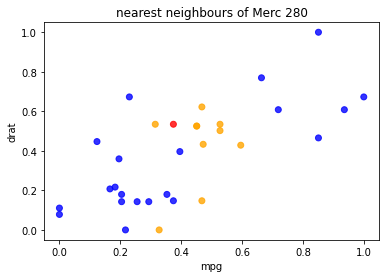

In [19]:
meandiffs = np.zeros(len(mtcars3))
for x in range(len(mtcars3)):
    # compute mean absolute difference
    meandiffs[x] = abs(mtcars3.loc['Merc 280',:] - mtcars3.loc[mtcars3.index[x],:]).mean()

colors1 = np.where(mtcars3.index=='Merc 280','red','blue')    
diffcolors1 = np.where((meandiffs<0.25) & (meandiffs>0), 'orange',colors1)

plt.scatter(mtcars3.wt, mtcars3.qsec, color=diffcolors1, alpha=0.8)
plt.xlabel('wt')
plt.ylabel('qsec')
plt.title('nearest neighbours of Merc 280')
plt.show()

plt.scatter(mtcars3.mpg, mtcars3.drat, color=diffcolors1, alpha=0.8)
plt.xlabel('mpg')
plt.ylabel('drat')
plt.title('nearest neighbours of Merc 280')
plt.show()

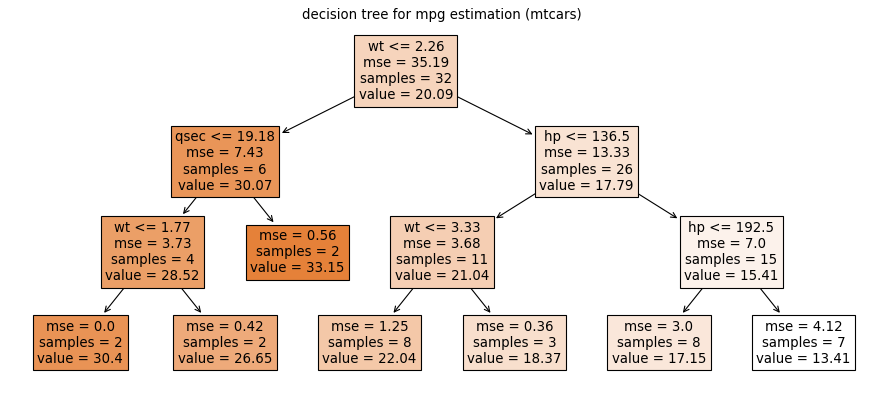

In [20]:
# use decision tree for visual inspection 

from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree

clf = DecisionTreeRegressor(max_depth = 3, min_samples_leaf=2,
                             random_state = 0)
features = ['hp','wt','vs','qsec']
dt1 = clf.fit(mtcars[features], mtcars.mpg)

# plotting tree using sklearn (i.e. not using GraphViz)
plt.figure(figsize=(14,6), dpi=80)
tree.plot_tree(dt1, feature_names=features, 
               filled=True, fontsize=12, precision=2)
plt.title('decision tree for mpg estimation (mtcars)');

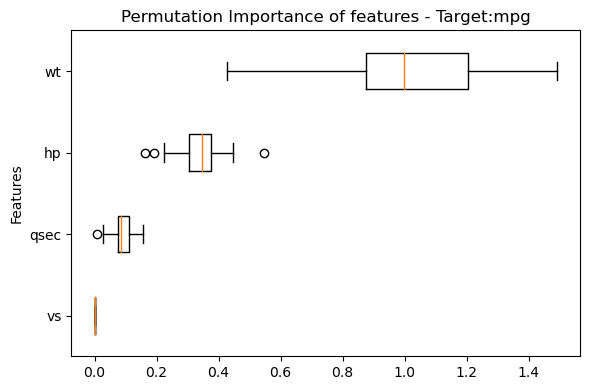

In [21]:
# Checking Permutation Importance of Features

from sklearn.inspection import permutation_importance

result = permutation_importance(dt1, mtcars[features], mtcars.mpg, n_repeats=30, random_state=0, n_jobs=-1)

fig, ax = plt.subplots(dpi=100)
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, 
           labels=np.array(features)[sorted_idx])
ax.set_title("Permutation Importance of features - Target:mpg")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

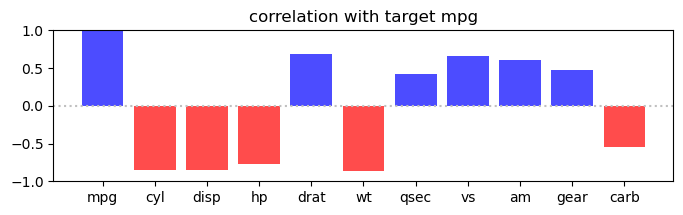

In [22]:
# get correations of features with target

def getcorr2tgt(df, tgt):
    return([np.corrcoef(df[xi],df[tgt])[0,1] for xi in df.columns])

corrs = np.array(getcorr2tgt(mtcars, 'mpg'))
colors = np.where(corrs>0, 'blue','red')
plt.figure(dpi=100, figsize=(8,2))
plt.bar(mtcars.columns, corrs, 
        color=colors, alpha=0.7)
plt.title('correlation with target mpg')
plt.ylim(-1,1)
plt.axhline(0, linestyle=':', color='silver')
plt.show()

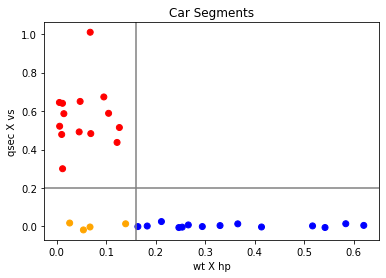

In [23]:
colorpal = ['red','orange','blue']
coloridx1 = [1 if x>0.16 else 0 for x in mtcars3.wt*mtcars3.hp]
coloridx2 = [0 if x>0.2 else 1 for x in mtcars3.qsec*mtcars3.vs]
coloridx = np.array(coloridx1) + np.array(coloridx2)
colors1 = [colorpal[x] for x in coloridx]


plt.scatter(rjitt(mtcars3.wt*mtcars3.hp), rjitt(mtcars3.qsec*mtcars3.vs), color=colors1)
plt.axhline(0.2, color='grey')
plt.axvline(0.16, color='grey')
plt.xlabel('wt X hp')
plt.ylabel('qsec X vs')
plt.title('Car Segments')
plt.show()

Reasoning: Correlation and Permutation Importance from DT do not exactly correspond each other

Text(0.5, 0, 'mpg')

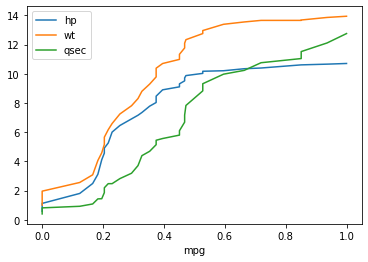

In [24]:
mtcars4 = mtcars3.sort_values('mpg')
plt.plot(mtcars4.mpg, mtcars4.hp.cumsum())
plt.plot(mtcars4.mpg, mtcars4.wt.cumsum())
plt.plot(mtcars4.mpg, mtcars4.qsec.cumsum())
plt.legend(['hp','wt','qsec'])
plt.xlabel('mpg')

## Scatterplot Matrix

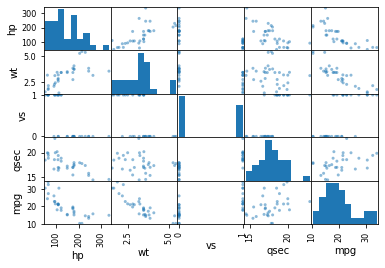

In [25]:
# create a scatterplot matrix
from pandas.plotting import scatter_matrix

features1 = features +['mpg'] # features plus mpg the target
scatter_matrix(mtcars[features1], alpha=0.5);

## Heatmap

Pattern : high hp and wt cars shows high mpg on average


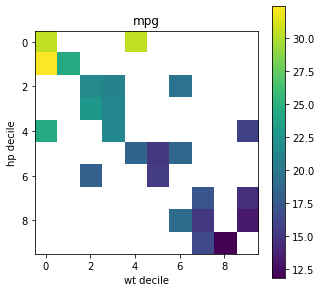

hp,"(51.999, 66.0]","(66.0, 93.4]","(93.4, 106.2]","(106.2, 110.0]","(110.0, 123.0]","(123.0, 165.0]","(165.0, 178.5]","(178.5, 200.0]","(200.0, 243.5]","(243.5, 335.0]"
wt,,,,,,,,,,
"(1.512, 1.956]",30.533333,NaN,NaN,NaN,30.4,NaN,NaN,NaN,NaN,NaN
"(1.956, 2.349]",32.400000,24.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2.349, 2.773]",NaN,NaN,21.5,21.0,NaN,NaN,19.7,NaN,NaN,NaN
"(2.773, 3.158]",NaN,NaN,22.8,21.2,NaN,NaN,NaN,NaN,NaN,NaN
"(3.158, 3.325]",24.400000,NaN,NaN,21.4,NaN,NaN,NaN,NaN,NaN,15.80
"(3.325, 3.44]",NaN,NaN,NaN,NaN,18.5,15.2,18.7,NaN,NaN,NaN
"(3.44, 3.555]",NaN,NaN,18.1,NaN,NaN,15.5,NaN,NaN,NaN,NaN
"(3.555, 3.77]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,14.65
"(3.77, 4.048]",NaN,NaN,NaN,NaN,NaN,NaN,19.2,15.2,NaN,13.30


In [26]:
# draw a heatmap using imshow


whm0 = mtcars[['wt','hp','mpg']]
whm0['wt'] = pd.qcut(whm0['wt'],10) # get decile code
whm0['hp'] = pd.qcut(whm0['hp'],10)
whm = whm0[['wt','hp','mpg']].groupby(by=['wt','hp']).mean().reset_index()
whm = whm.pivot(index='wt', columns='hp', values='mpg')

print('Pattern : high hp and wt cars shows high mpg on average')

plt.figure(figsize=(5,5))
plt.imshow(whm, interpolation='nearest')
plt.xlabel('wt decile')
plt.ylabel('hp decile')
plt.title('mpg')
plt.colorbar()
plt.show()
whm

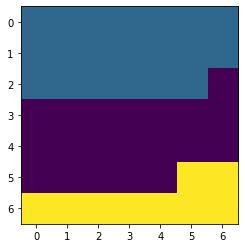

In [27]:
# c.f. a sample heatmap

plt.imshow(np.repeat([1,0,3,0,5,2,3.1],20)[:49].reshape(7,7), interpolation='nearest')

## Aggregation and Comparison

In [28]:
# create category label i.e. brand name

mtcarscat = mtcars.copy()
mtcarscat['cat'] = mtcarscat.index
brandCats = ['Merc','Hornet','Toyota','Mazda']
for z in brandCats:
    mtcarscat['cat'] = [z if z in x else x for x in mtcarscat.cat]
    
mtcarscat['cat'] = np.where(mtcarscat.cat.isin(brandCats), mtcarscat.cat, 'Other')
mtcarscat['cat'].head()

Mazda RX4             Mazda
Mazda RX4 Wag         Mazda
Datsun 710            Other
Hornet 4 Drive       Hornet
Hornet Sportabout    Hornet
Name: cat, dtype: object

In [29]:
# aggregate mpg, hp, and wt by brand category

mtcarscatagg = mtcarscat[['cat','mpg','hp','wt']].groupby('cat').mean().reset_index()
mtcarscatagg

,cat,mpg,hp,wt
0,Hornet,20.050000,142.500000,3.327500
1,Mazda,21.000000,110.000000,2.747500
2,Merc,19.014286,134.714286,3.542857
3,Other,19.594737,162.315789,3.247474
4,Toyota,27.700000,81.000000,2.150000


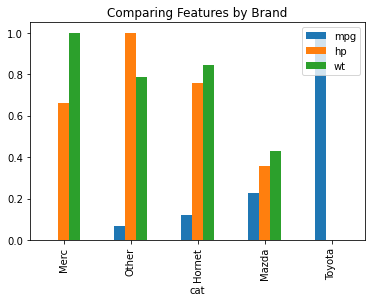

In [30]:
# Scaling for comparison

mtcarscataggs = mtcarscatagg[['mpg','hp','wt']]
mtcarscataggs.index = mtcarscatagg.cat
mtcarscataggs = mtcarscataggs.apply(mnmx_scl).sort_values('mpg')

mtcarscataggs.plot.bar()
plt.title('Comparing Features by Brand')
plt.show()

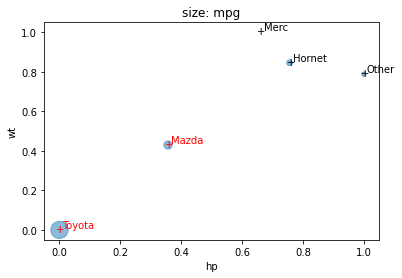

In [31]:
textcolors = ['red' if y>0.2 else 'black' for y in mtcarscataggs.mpg]
mtcarscataggs[['hp','wt']].plot.scatter('hp','wt', s=mtcarscataggs.mpg*300, alpha=0.5)
for x in range(len(mtcarscataggs)):
    plt.text(mtcarscataggs.hp[x]-0.01, mtcarscataggs.wt[x]-0.01, '+', color=textcolors[x])
    plt.text(mtcarscataggs.hp[x]+0.01, mtcarscataggs.wt[x]+0.01, mtcarscataggs.index[x], color=textcolors[x])
    
plt.title('size: mpg')
plt.show()

dimensions to show  ['cyl' 'vs' 'am' 'gear' 'carb'] 
*_show low cardinality dimensions only


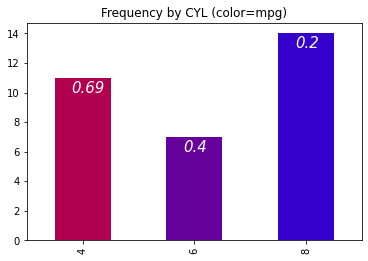

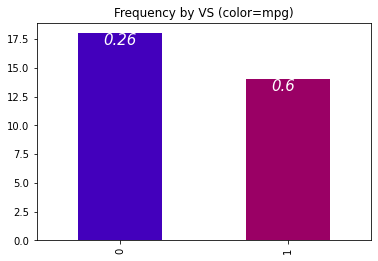

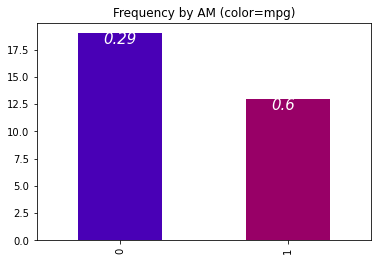

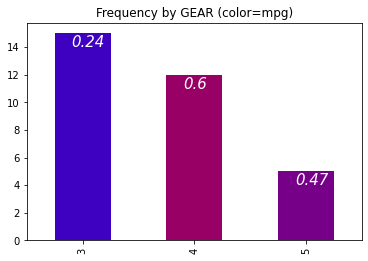

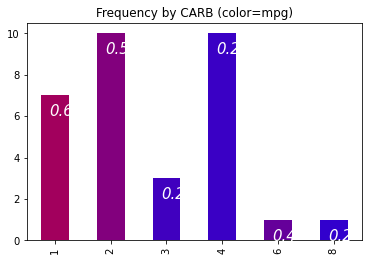

In [32]:
# a custom fuction to show frequency and mpg by a given dimension

def drawmpg_bydim(dim):
    mpgbydim = mtcars3[[dim,'mpg']].groupby(dim).mean()
    # print(mpgbydim)
    colors1 = [(x, 0, 1-x) for x in mpgbydim.mpg]
    countedValues = mtcars[dim].value_counts().sort_index()
    # print(countedValues)
    countedValues.plot.bar(color=colors1)    
    
    titletext = 'Frequency by ' + dim.upper() + ' (color=mpg)'
    plt.title(titletext)
    
    # show mean of zeromax scaled mpg
    for x in range(len(mpgbydim)):
        plt.text(x-0.1, 
                 countedValues[countedValues.index[x]]-1,
                 round(mpgbydim.mpg.values[x],2), 
                 color='white', style='italic', size=15)
    plt.show()


# call the function

# get list of dimension variables with less than 10 unique values
getnuniques = lambda a : len(a.unique())
lowcard_cols = mtcars.apply(getnuniques)
lowcard_cols = lowcard_cols[lowcard_cols <10].index

print('dimensions to show ', lowcard_cols.values, '\n*_show low cardinality dimensions only')

for x in lowcard_cols:
    drawmpg_bydim(x)    
 


In [33]:
mtcars[['hp','wt','mpg','am']].groupby('am').agg(['min','max','mean','std']).reset_index()

am  hp                                 wt                              mpg  \
     min  max        mean        std    min    max      mean       std   min   
0  0  62  245  160.263158  53.908196  2.465  5.424  3.768895  0.777400  10.4   
1  1  52  335  126.846154  84.062324  1.513  3.570  2.411000  0.616982  15.0   

                              
    max       mean       std  
0  24.4  17.147368  3.833966  
1  33.9  24.392308  6.166504

## Questions for Additional Practice
- get mean mpg and hp of Toyota models?
- what is the model of the highest mpg among Mercs?
- a relationsip between hp per wt and mpg?
- a bar chart of correlation coefficients of all descriptor variables with mpg?

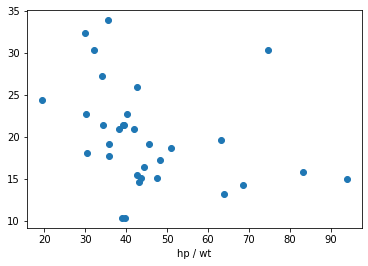

('correlation : ', -0.31350978114989647)

In [34]:
# relationsip between hp per wt and mpg?

hpprwt = mtcars.hp/mtcars.wt
plt.scatter(hpprwt, mtcars.mpg)
plt.xlabel('hp / wt')
plt.show()
'correlation : ', np.corrcoef(hpprwt, mtcars.mpg)[0,1]

In [35]:
# get largest hp cars by AM

# get top n records

hptops_am = mtcars.groupby('am')['hp'].nlargest(5).reset_index()
hptops_am

,am,level_1,hp
0,0,Duster 360,245
1,0,Camaro Z28,245
2,0,Chrysler Imperial,230
3,0,Lincoln Continental,215
4,0,Cadillac Fleetwood,205
5,1,Maserati Bora,335
6,1,Ford Pantera L,264
7,1,Ferrari Dino,175
8,1,Lotus Europa,113
9,1,Mazda RX4,110


<AxesSubplot:xlabel='level_1'>

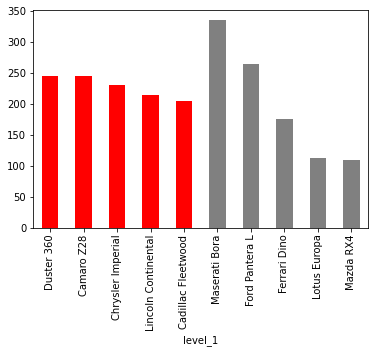

In [36]:
# Top 5 hp cars by AM group

colors1 = np.repeat(['red','grey'],5)
hptops_am.set_index('level_1')['hp'].plot(kind='bar', color=colors1)

## Appendix. Analyzing Mercedes-Benz GLS Class Sales History

In [37]:
# Mercedes-Benz GLS class sales

# Structure :: ['year','EUsales','USsales']

glssales = np.array([2006, 3007, 18776,
2007, 8027, 26396,
2008, 4227, 23328,
2009, 2871, 15012,
2010, 2249, 19943,
2011, 2508, 25139,
2012, 1573, 26042,
2013, 4829, 29912,
2014, 4187, 26597,
2015, 3753, 27707,
2016, 5361, 30442,
2017, 4537, 32248,
2018, 3534, 21973])

<AxesSubplot:xlabel='year'>

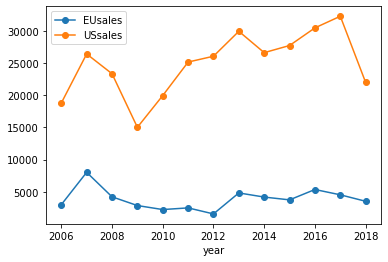

In [38]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf.index = glssalesdf.year
glssalesdf = glssalesdf[['EUsales','USsales']]
glssalesdf.plot(marker='o')

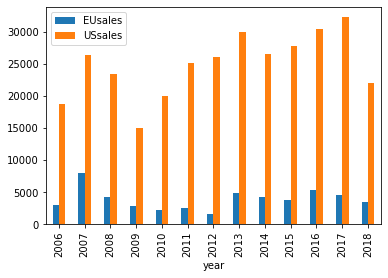

In [39]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))

# to use pd for plotting set year column one time
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf1 = glssalesdf

ax = glssalesdf1.set_index('year').plot( kind='bar')

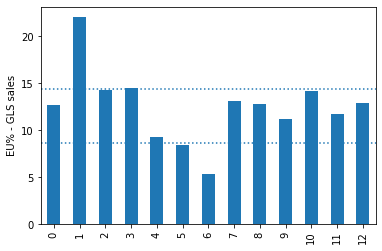

In [40]:
glsEUratio = glssalesdf.EUsales / glssalesdf.sum(axis=1) *100
glsEUratio.plot.bar()
plt.ylabel('EU% - GLS sales')
plt.axhline(glsEUratio.quantile(0.1), linestyle=':')
plt.axhline(glsEUratio.quantile(0.9), linestyle=':')
plt.show()